In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib widget


In [35]:

import torch
import numpy as np
import pickle as pkl
from torch import nn


# from qclassifier import models, visualization, noise
import qclassifier.models
from qclassifier.noise import DepolarizingChannel, ThermalRelaxationChannel

from qclassifier.datasets import get_sample_data
from qclassifier.visualization import plot_prediction


In [42]:
# Carico il dataset
data_train, data_test = get_sample_data('one piece', N_train = 10000, N_test = 2500)

D = 2
C = 4



In [ ]:
# Provo a mettere il modello su gpu e testare la velocità
# (caricando direttamente tutto il dataset su gpu)

In [40]:
prova = DepolarizingChannel(p = 0.1)
prova = ThermalRelaxationChannel(p_z=0.1, p_r0=0.1, p_r1=0.1)

rho = torch.zeros((10,2,2),dtype = torch.cfloat)
rho[:,0,0] = 1
rho = prova(rho)


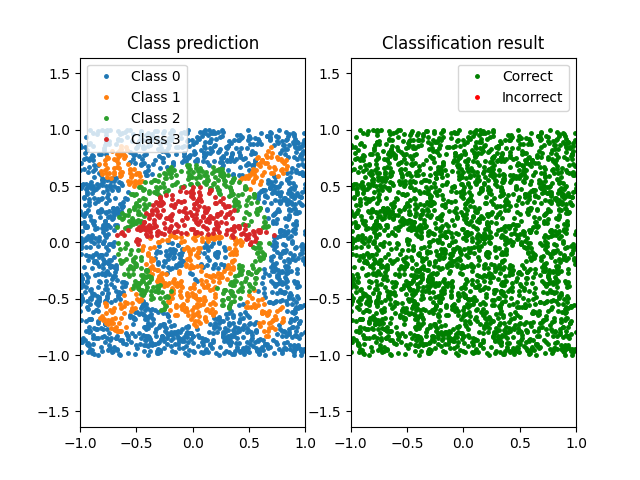

In [20]:
from matplotlib import pyplot as plt
plt.figure()
plot_prediction(data_test, data_test[1],'one piece logo')

In [3]:
L_values = [1,2,4,8]

for i,L in enumerate(L_values):
    
    print(L)

    # Modello originale
    depolarizing_channel = DepolarizingChannel()
    thermal_channel = ThermalRelaxationChannel()

    model = ClassifierOriginal(D = D, L = L, C = C, noise_channels = [depolarizing_channel, thermal_channel])        
    # model, _ = find_best_initial_conditions(model, data_train, batch_size = 250, epochs = 10)
    optimizer = torch.optim.Adam(model.parameters(), lr = 1e-2)
    stats = train(model, optimizer, data_train, data_test, epochs = 500, batch_size = 250, test_accuracy = True, patience = 25)

    accuracy = test_accuracy(model, data_test, batch_size = 500)

    with open(f'ResultsNew/MNIST_Original_L_{L}.pkl','wb') as f:
        pkl.dump([model, accuracy, stats], f)

    
    # Modello migliorato
    depolarizing_channel = DepolarizingChannel()
    thermal_channel = ThermalRelaxationChannel()

    model = ClassifierImproved(D = D, L = L, C = C, noise_channels = [depolarizing_channel, thermal_channel])        
    # model, _ = find_best_initial_conditions(model, data_train, batch_size = 250, epochs = 10)
    optimizer = torch.optim.Adam(model.parameters(), lr = 1e-2)
    stats = train(model, optimizer, data_train, data_test, epochs = 500, batch_size = 250, test_accuracy = True, patience = 25)

    accuracy = test_accuracy(model, data_test, batch_size = 500)

    with open(f'ResultsNew/MNIST_Improved_L_{L}.pkl','wb') as f:
        pkl.dump([model, accuracy, stats], f)

    # Modello migliorato multi-qubit
    depolarizing_channel = DepolarizingChannel()
    thermal_channel = ThermalRelaxationChannel()

    model = ClassifierMultiQubit(D = D, L = L, C = C, noise_channels = [depolarizing_channel, thermal_channel])        
    # model, _ = find_best_initial_conditions(model, data_train, batch_size = 250, epochs = 10)
    optimizer = torch.optim.Adam(model.parameters(), lr = 1e-2)
    stats = train(model, optimizer, data_train, data_test, epochs = 500, batch_size = 250, test_accuracy = True, patience = 25)

    accuracy = test_accuracy(model, data_test, batch_size = 500)

    with open(f'ResultsNew/MNIST_Multiqubit_L_{L}.pkl','wb') as f:
        pkl.dump([model, accuracy, stats], f)


    


1


 16%|█▌        | 81/500 [00:47<04:04,  1.72it/s, Train loss=0.318, Train accuracy=0.858, Test loss=0.335, Test accuracy=0.841]


2


 21%|██        | 105/500 [01:43<06:29,  1.01it/s, Train loss=0.189, Train accuracy=0.926, Test loss=0.224, Test accuracy=0.901]


4


 29%|██▉       | 144/500 [04:16<10:33,  1.78s/it, Train loss=0.12, Train accuracy=0.962, Test loss=0.17, Test accuracy=0.921]  


8


 13%|█▎        | 66/500 [03:45<24:42,  3.42s/it, Train loss=0.0839, Train accuracy=0.982, Test loss=0.148, Test accuracy=0.939]


In [ ]:
L_values = [1,2,4,8]

for i,L in enumerate(L_values):
    with open(f'ResultsNew/MNIST_Improved_L_{L}.pkl','rb') as f:
        model, accuracy, stats = pkl.load(f)

c:\Users\ISTC-CNR\AppData\Local\Programs\Python\Python38\lib\site-packages\qutip\bloch.py:600: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  self.fig = plt.figure(figsize=self.figsize)


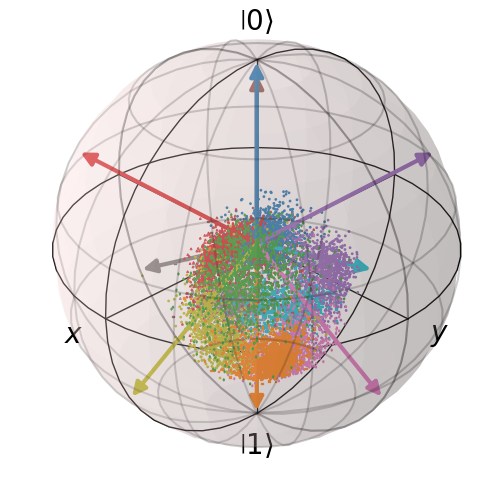

In [206]:


# model.noise_channels[0].__init__(p = 0.1)
# model.noise_channels[1].__init__(p_z = 0.3)
model.noise_channels[1].__init__(p_r1 = 0.1)

rho = torch.squeeze(model(data_train[0]))
# plt.figure(figsize = (8,8))
plot_on_bloch_sphere(rho, data_train[1], model.psi_c, view = [-45,30])



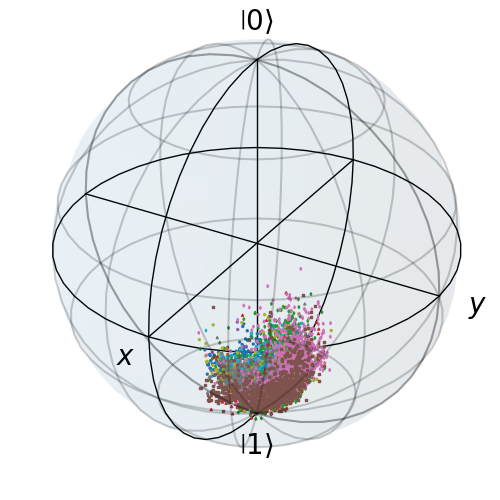

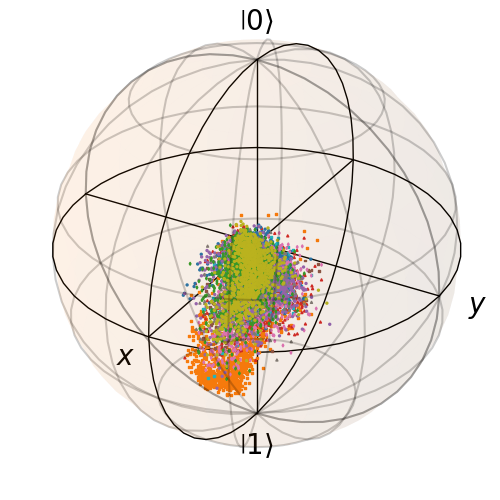

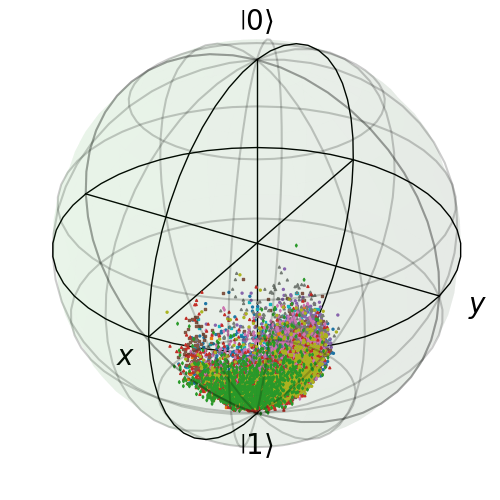

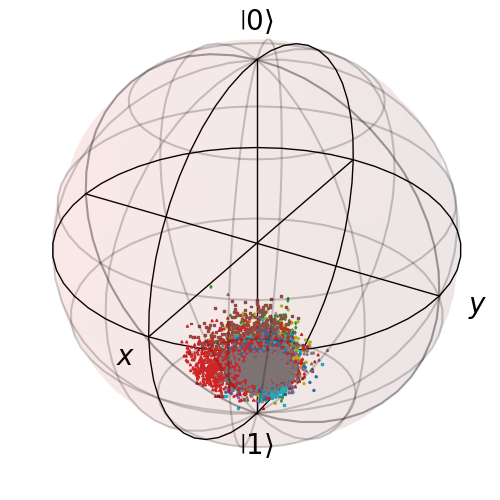

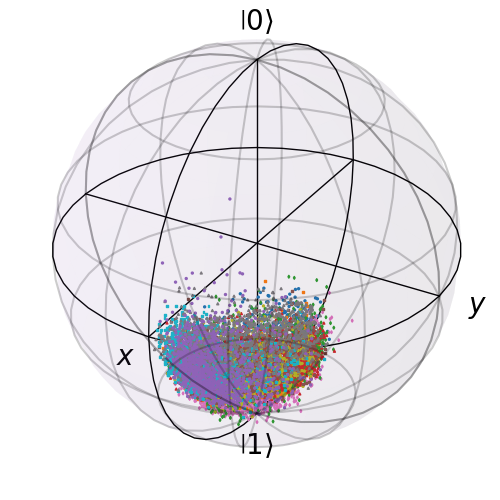

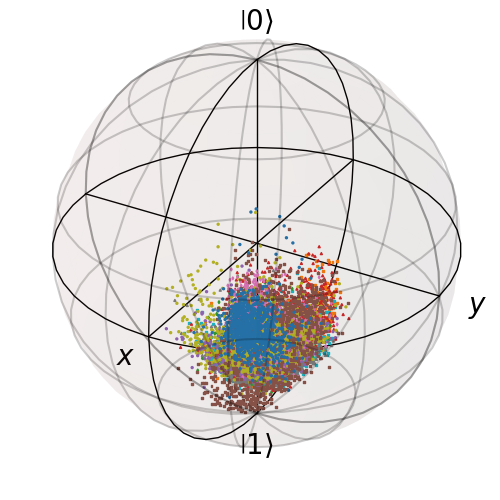

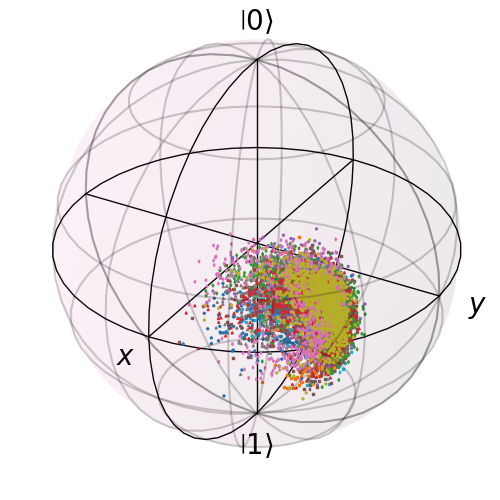

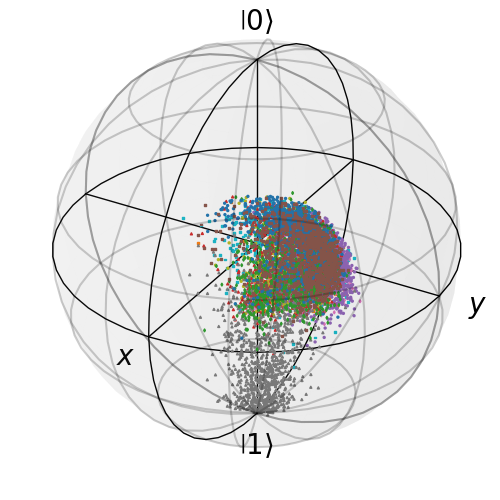

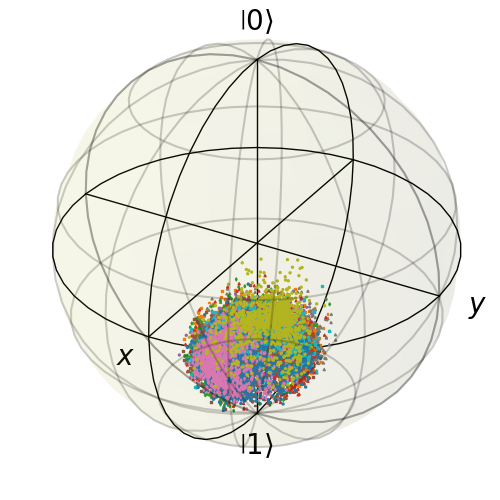

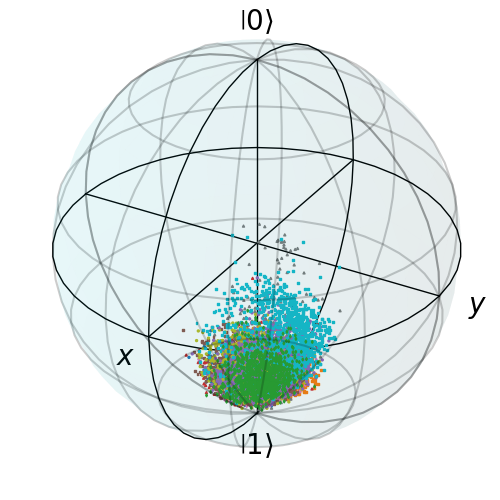

In [8]:

with open(f'ResultsNew/MNIST_Multiqubit_L_8.pkl','rb') as f:
    model, accuracy, stats = pkl.load(f)

# model.noise_channels[0].__init__(p = 0.1)
# model.noise_channels[1].__init__(p_z = 0.1)
model.noise_channels[1].__init__(p_r1 = 0.3)

rho = torch.squeeze(model(data_train[0]))
plot_multiqubit_on_bloch_sphere(rho,data_train[1])

In [ ]:
from matplotlib import pyplot as plt
plt.plot()